<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Ход-выполнения-проекта" data-toc-modified-id="Ход-выполнения-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ход выполнения проекта</a></span></li></ul></li><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования-данных-для-решения-задачи" data-toc-modified-id="Алгоритм-преобразования-данных-для-решения-задачи-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования данных для решения задачи</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

## Описание проекта

**Задача:** защитить данные клиентов страховой компании «Хоть потоп». Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.  
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.  

### Описание данных

Набор данных находится в файле `/datasets/insurance.csv`.
* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.  

### Ход выполнения проекта

В ходе выполнения решения задачи необходимо проделать следующие шаги:
1. Загрузить и изучить данные;
2. Умножить признаки на обратимую матрицу. Зафиксировать наличие изменений качества линейной регрессии;
3. Предложить алгоритм преобразования данных для решения задачи;
4. Запрограммировать предложенный алгоритм, применив матричные операции. Проверить, что качество линейной регрессии не отличается ДО и ПОСЛЕ преобразования, применив метрику *R2*.

## Загрузка и изучение данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings

In [2]:
# увеличим максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', None)

# Задаем количество знаков после запятой для всех значений в датафрейме
pd.set_option('float_format', '{:.2f}'.format) 

# Вывести из под комментария перед финальным запуском:
# Игнорируем предупреждения о возможных изменениях работы функций в будущих версиях в Pandas
warnings.filterwarnings("ignore") 

In [3]:
# считывание csv-файлов
try: 
    main_df = pd.read_csv('/datasets/insurance.csv')
except:
    main_df = pd.read_csv('insurance.csv')

Создадим копию копии датафреймов, чтобы убедиться, что данные не испорчены после предобработки.

In [4]:
df = main_df.copy(deep=True)

Для вывода общей информации по датафрейму напишем функцию:

In [5]:
def description_df(df):
    '''
    Выводит первые 5 строк датафрейма, общую информацию о датафрейме,
    показывает описание количественных признаков, проверяет наличие дубликатов
    '''
       
    # Выведем общую информацию о таблице
    display(df.head())
    display(df.info())
    display(df.describe())
    
    # Проверим наличие дубликатов
    if df.duplicated().sum() == 0:
        print('Дубликатов не обнаружено')
    else:
        print('Количество полных дубликатов:', df.duplicated().sum())

Изучим общую информацию:

In [6]:
description_df(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.00,49600.00,1,0
1,0,46.00,38000.00,1,1
2,0,29.00,21000.00,0,0
3,0,21.00,41700.00,2,0
4,1,28.00,26100.00,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.50,30.95,39916.36,1.19,0.15
std,0.50,8.44,9900.08,1.09,0.46
min,0.00,18.00,5300.00,0.00,0.00
25%,0.00,24.00,33300.00,0.00,0.00
50%,0.00,30.00,40200.00,1.00,0.00
75%,1.00,37.00,46600.00,2.00,0.00
max,1.00,65.00,79000.00,6.00,5.00


Количество полных дубликатов: 153


In [7]:
# Напишем функцию строющую распределения всех столбцов
def hist_df(df):
    plt.figure(figsize=(20,12))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    
    plt.subplot(3, 2, 1)
    sns.countplot(y='Пол', data=df, palette='coolwarm')
    plt.title('Распределение полов')
    plt.xlabel('Кол-во');
        
    plt.subplot(3, 2, 2)
    sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()))
    plt.title('Распределение возрастов')
    plt.ylabel('Плотность частоты');

    plt.subplot(3, 2, 3)
    sns.countplot(y='Страховые выплаты', data=df)
    plt.title('Распределение по количеству страховых выплат')
    plt.xlabel('Кол-во');

    plt.subplot(3, 2, 4)
    sns.distplot(df['Зарплата'], bins=100)
    plt.title('Распределение зарплат')
    plt.ylabel('Плотность частоты');

    plt.subplot(3, 2, 5)
    sns.countplot(x='Члены семьи', data=df, palette='coolwarm')
    plt.title('Распределение по количеству членов семьи')
    plt.ylabel('Кол-во');

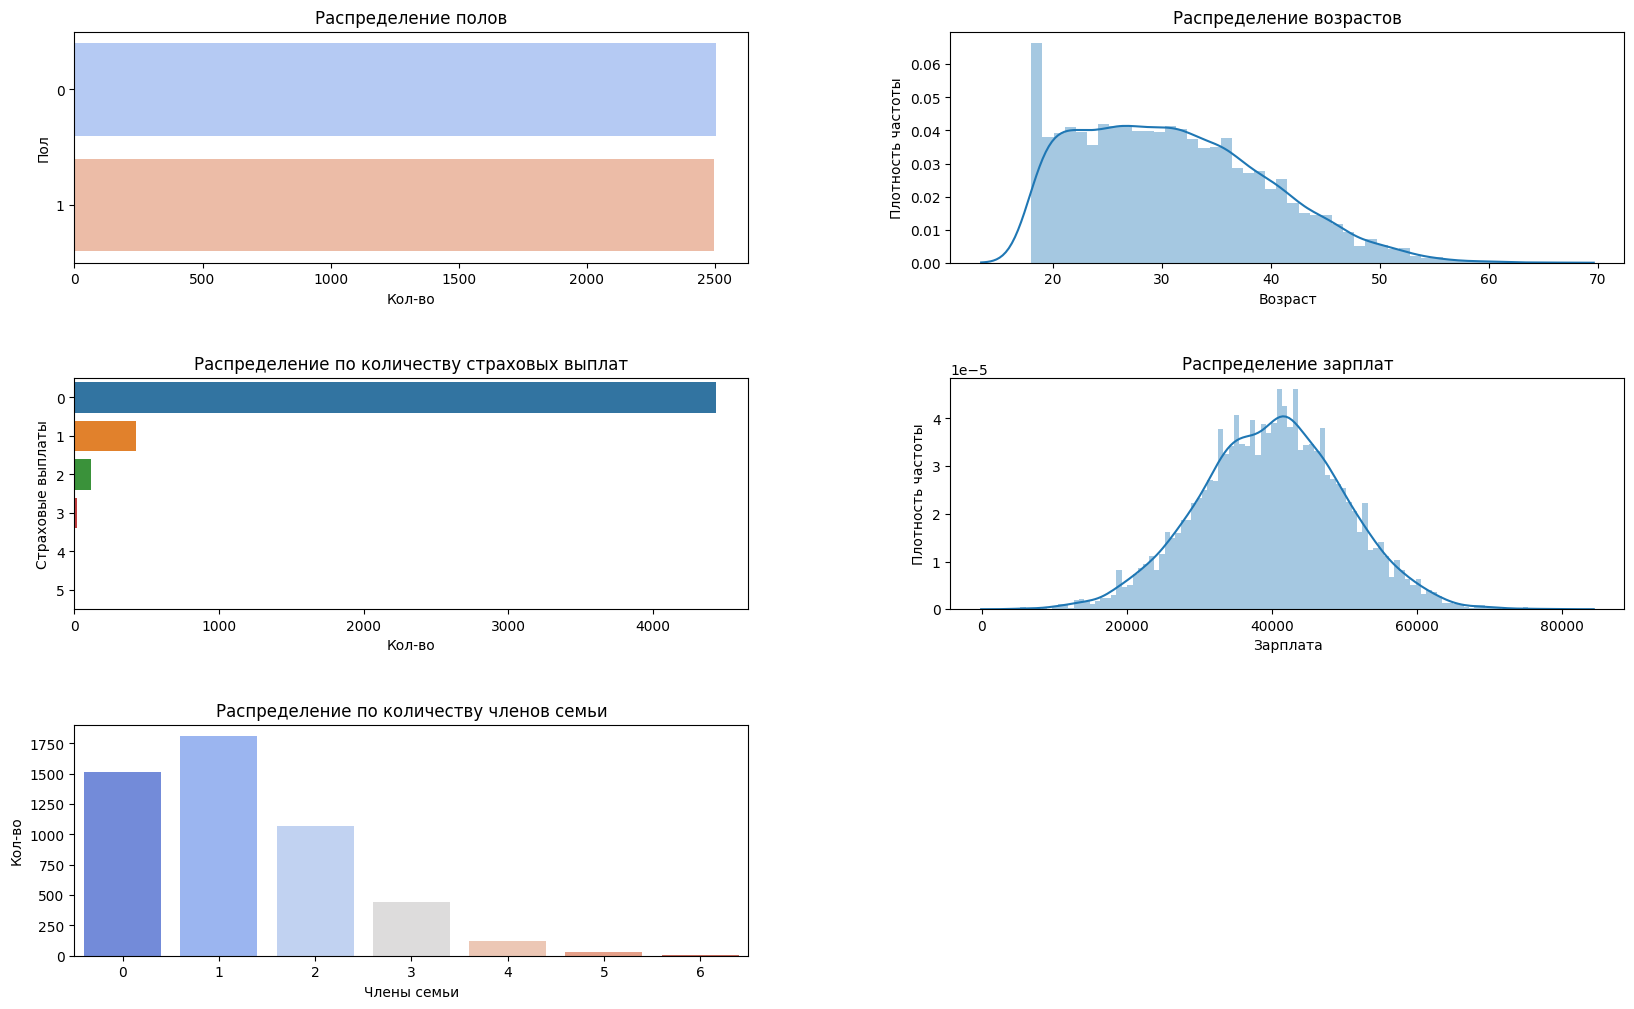

In [8]:
hist_df(df)

Резюмируем полученную общую информацию из представленных данных:
* Имеем 5тыс. значений, 5 столбцов;
* Пропуски в данных отсутствуют;
* Столбцы названы по-русски - необходимо переименовать в соответствии с "хорошим стилем" для удобства работы с данными;
* Имеются полные дубликаты - необходимо будет очистить данные от них;
* Целевой признак - **Страховые выплаты**. Больше всего людей не имеющих страховых выплат;
* Мужчины и женщины представленные в данных представлены в равном количестве;
* Клиенты, представленные в данных имеют возраст от 18 до 65 лет. Большинство клиентов младше 40 лет;
* Зарплата клиентов имеет нормальное распределение;
* Количество членов семьи варьируется от 0 до 6.

### Предобработка данных

Переименуем столбцы датасета:

In [9]:
df.columns = ['sex', 'age', 'salary', 'family_members', 'insurance']

Избавимся от полных дубликатов:

In [10]:
df.drop_duplicates(inplace=True)

Изменим типы данных столбцов **Возраст** и **Зарплата** на целочисленный:

In [11]:
df[['age', 'salary']] = df[['age', 'salary']].astype('int64')

In [12]:
df.dtypes

sex               int64
age               int64
salary            int64
family_members    int64
insurance         int64
dtype: object

**Вывод:**  
* Изучили общие данные;
* Предобработали данные:
    * Избавили от думабликатов;
    * Переименовали столбцы;
    * Преобразовали тип данных.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Формула расчета предсказаний:
$$
a = Xw
$$

Задача обучения:
$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения (ветор весов линейной регрессии $w$):
$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** изменится ли качество линейной регрессии при умножении признаков на обратную матрицу?

Для ответа на вопрос произведем некоторые преобразования. 
1. Обозначим новые предсказания как $a'$, новую матрицу предсказания как $Z$, новый вектор весов $w'$. Получим следующую формулу:
$$
a' = Z w',
$$
где $Z$ = $X P$

2. Подставим новую матрицу в формулу весов линейной регрессии:
$$
w' = ((X P)^T X P)^{-1} (X P)^T y
$$

3. Выпишем основные свойства матриц:

- ($A(BC) = (AB)C$) - это свойство ассоциативности (сочетательности) матриц<br>
- $(P^T)^{-1} = (P^{-1})^T$ - то есть: транспортированная оратная матрица есть обратная матрица транспортированная <br>
- $(AB)^T = B^T A^T$ - то есть: транспонированное произведение матриц равно произведению транспонированных матриц <br>
- $(AB)^{-1} = B^{-1} A^{-1}$ - то есть: обратная матрица от произведения двух матриц равна обратной матрицы B (второй) к обратной матрице А (первой)<br>
- $P P^{-1} = E$ - умножение матрицы на свою обратную - есть единичная матрица.<br>
- $(ABC)^{-1} =C^{-1} B^{-1} A^{-1}$<br>

4. Раскроем скобки из п.2 с помощью свойств из п.3:

$$
w' = (P^T X^T XP)^{-1} P^T X^T y
$$

продолжая раскрывать скобки получим:
$$ 
w' = P^{-1} X^{-1} (X^T)^{-1} (P^T)^{-1} P^T X^T  y
$$
т.к. $(P^T)^{-1} P^T = (P^{-1})^T P^T = (P P^{-1})^T = E$ (единичная матрица равная самой себе), сократим запись

$$ 
w' = P^{-1} X^{-1} (X^T)^{-1} X^T y = P^{-1} X^{-1} (X^{-1})^T X^T y = P^{-1} X^{-1} (X^T)^{-1} X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

5. Правая часть выражения $(X^T X)^{-1} X^T y = w$, соответственно:

$$
w' = P^{-1} w
$$

6. Подставим получившиеся выражение из п.5 в п.1 (учитывая, что $Z = XP$) и получим:
$$
a' = XP (P^{-1} w) = X (P P^{-1}) w = Xw = a
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} (P^{-1})^T P^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P P^{-1})^T X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} X^T y
$$
, где $(X^T X)^{-1} X^T y = w$
Следовательно:
$$
w' = P^{-1} w
$$

**Ответ:** качество линейной регрессии при умножении признаков на обратную матрицу не изменится.

## Алгоритм преобразования данных для решения задачи

**Алгоритм:**  
1. Разделим данные на признаки (*x*) и целевой признак (*y*).
2. Создадим случайную матрицу 4х4 и проверим ее на обратимость.
3. Напишем функцию обучения модели линейной регрессии.
4. Зашифруем данные клиентов страховой компании, умножив матрицу признаков *X* на случайную обратимую матрицу *P*

$$
Z = X P
$$
Тогда исходая матрица будет выражена как:
$$
X = Z P^{-1}
$$

5. Рассчитаем значение метрики *R2* для *Z* и *X*.

**Обоснование:**  ранее было доказано, что при умножении матрицы признаков на любую обратимую матрицу качество линейной регрессии не изменится. Соответственно, можно смело получить другой результат линейной регрессии по описанному выше алгоритму.

## Проверка алгоритма

Проверим написанный алгоритм на предоставленных данных.

In [13]:
# Выделим признаки и целевой признак
x = df.drop('insurance', axis=1)
y = df['insurance']

In [14]:
# Создадим случайную матрицу 4х4
p = np.random.normal(size=(4,4))
p

array([[ 0.61020108, -0.54096252,  0.23130672, -2.01164108],
       [-1.65766803, -0.11583878,  0.79222536, -0.83355904],
       [ 0.51298278,  0.58425192,  1.65368854, -0.21241222],
       [ 1.49124196,  1.05358488,  0.13108339, -1.62321617]])

Проверим матрицу на обратимость - вероятность сгенерировать необратимую матрицу очень мала, но все же есть. При использовании необратимой матрицы дальнейшая работа по описанному алгоритму невозможна. Для проверки будем использовать функцию `numpy.linalg.inv()`, если матрица необратима, то код упадет с ошибкой.

In [15]:
p_inv = np.linalg.inv(p)
p_inv

array([[ 0.2300962 , -0.50225704,  0.21279603, -0.05508233],
       [-0.6904037 ,  0.33689195, -0.12017969,  0.69833751],
       [ 0.14362612,  0.00565554,  0.60249897, -0.25974148],
       [-0.22513501, -0.24229747,  0.16614452, -0.23436868]])

In [16]:
(p @ p_inv).round(2)

array([[ 1.,  0., -0., -0.],
       [-0.,  1., -0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

Матрица обратима. Переходим к написанию функции обучения модели.

In [17]:
# Напишем функцию обучения модели
def lin_alg(features, target):
    '''
    Обучает модель линейной регрессии и  
    возвращает значение метрики R2
    '''
    
    # Объявим модель
    lr = LinearRegression()
    # обучим модель
    lr.fit(features, target)
    # получим предсказания модели
    predict = lr.predict(features)
    # Считаем метрикуR2
    out_r2_score = r2_score(target, predict)
    
    return out_r2_score

In [18]:
# Умножим случайную матрицу на признаки
z = x @ p

In [19]:
# выведем значение метрики на исходных и преобразованных признаках
print("R2 исходного набора данных: ", lin_alg(x, y).round(4))
print("R2 преобразованного набора данных: ", lin_alg(z, y).round(4))

R2 исходного набора данных:  0.4302
R2 преобразованного набора данных:  0.4302


**Вывод:**  
* Выбранный алгоритм проверки описан, обоснован и проверен;
* Проведённый эксперимент показал, что значения метрики *R2* (коэф-т детерминации) ДО и ПОСЛЕ преобразования данных не изменилось. Это говорит о том, что качество модели также не изменилось;
* Значение коэф-та детерминации получилось ниже 0,5, что говорит о довольно низком качестве построенной модели;
* Случайность, реализованная в алгоритме каждый раз изменяет домножаемую матрицу при запуске, что делает зашифрованные данные каждый раз новыми. Такой вид исходных данных становится очень сложно восстановить без кода программы;
* Реализованный алгоритм полностью удовлетворяет поставленной задаче по защите персональных данных клиентов страховой компании.